In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
hp=pd.read_csv('USA_Housing.csv')

# Explore the data

In [4]:
hp.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


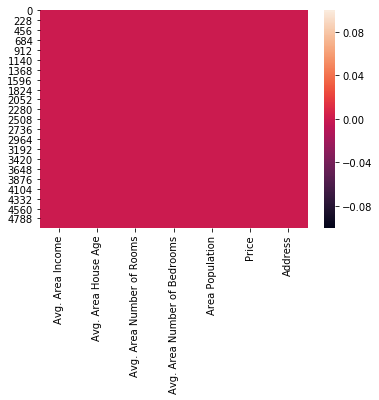

In [17]:
sns.heatmap(hp.isnull())
# no null values

In [5]:
hp.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


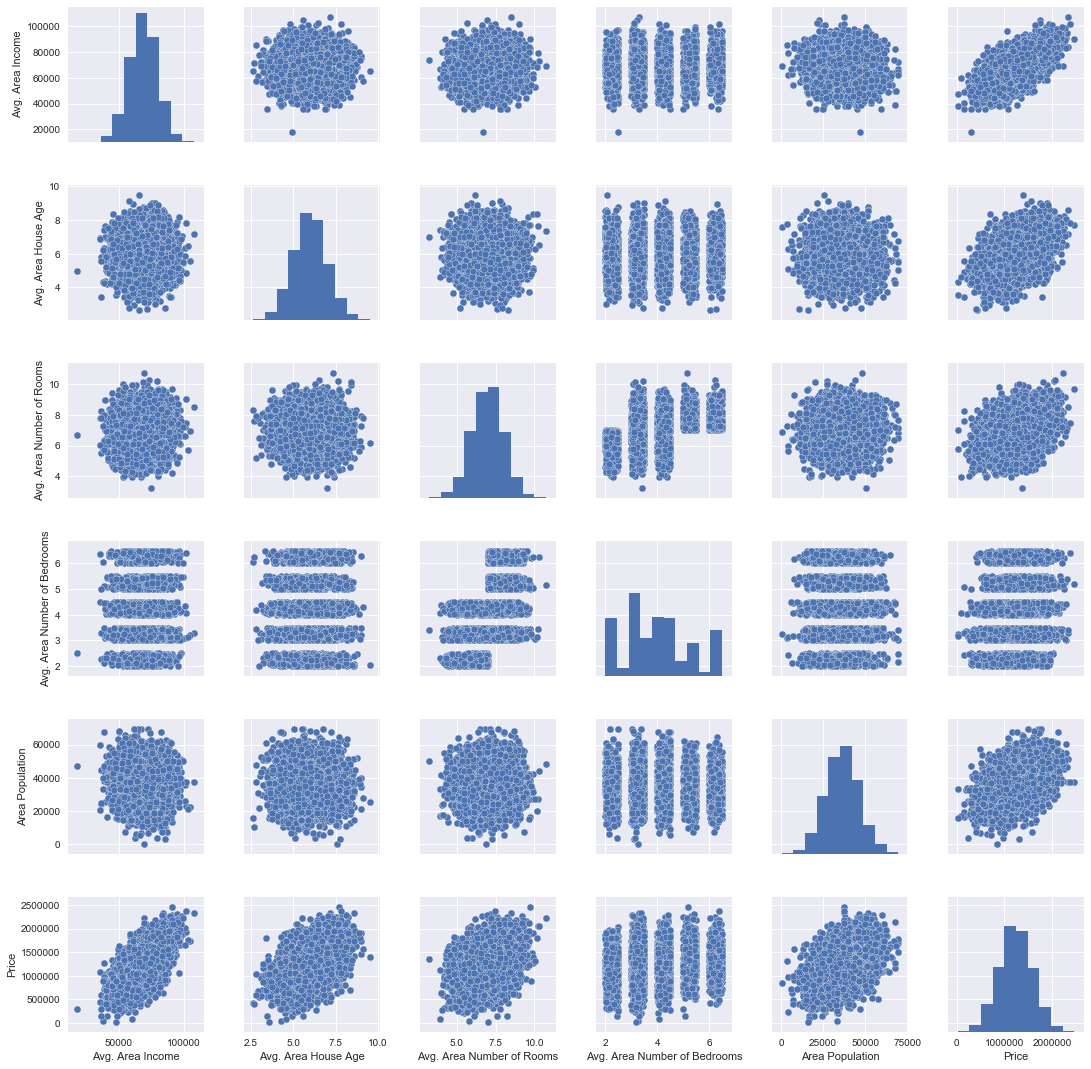

In [7]:
sns.pairplot(hp)

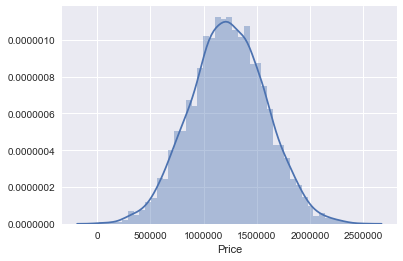

In [9]:
sns.distplot(hp['Price'])

In [90]:
hp.corr() # see address is droped out

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [108]:
X = hp.drop(['Address','Price'], axis=1)
y=hp['Price']

In [110]:
print( X.size)
print(y.size)

25000
5000


# Train the data

In [116]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# without using random_state, train adn test data will be different each time I run this code here.
# 42 is just a number i saw people mostly choose
# twst size = 0.2 is the size of the test set from, say X, 30000 rows, 0.2 will be 6000

In [120]:
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

21250
4250
3750
750


In [121]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2347,51168.428595,7.511730,7.083326,3.10,30369.193120
3439,83648.232739,8.243927,6.751507,3.32,21137.028874
4998,68001.331235,5.534388,7.130144,5.44,42625.620156
4826,79874.739355,4.936371,7.146377,4.14,30410.232961
3922,53562.403541,6.323328,4.027931,3.13,17964.469901


In [69]:
# fit the data 

In [122]:
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()

In [123]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
y_pred_lrm=lrm.predict(X_test)

Text(0,0.5,'actual')

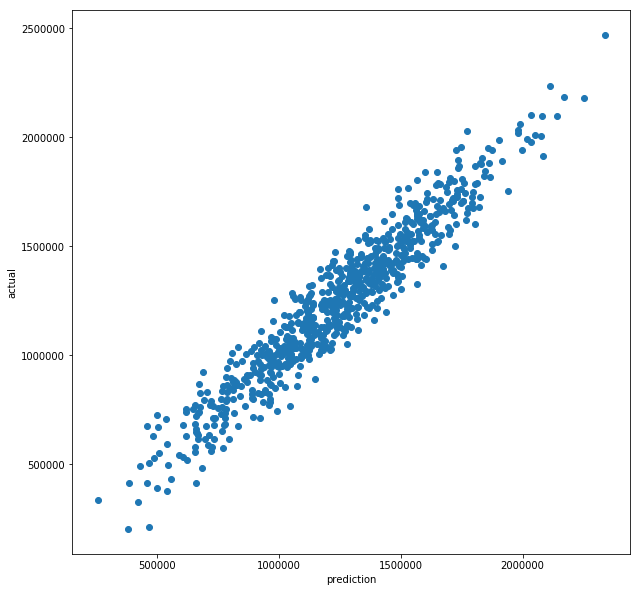

In [164]:
# predicted vs actual
plt.figure(figsize=(10,10))
plt.scatter(y_pred_lrm, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
# looks very accurate, this shows there is a strong correlation between the models predictions and actual results.

# Evaluation

In [165]:
metrics.r2_score(y_test, y_pred_lrm)
# R^2 is 91%, the model is well fit to the data but not quaranteed since it will increase by adding more variables
# into the model. lets see the residual next.

0.91470619175862455

Text(0,0.5,'residual')

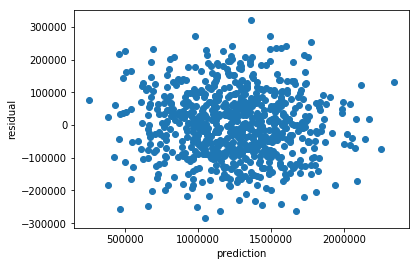

In [176]:
# check the residual
plt.scatter(y_pred_lrm,y_test-y_pred_lrm)
plt.xlabel('prediction')
plt.ylabel('residual')
# does not show any pattern, so this is a great model.The model indeed fits the data well.

In [179]:
# standard error
# if r^2 is close to 1, and s is small, the predicted results will be more accurate
np.sqrt(metrics.mean_squared_error(y_test, pred_lrm))
# need comparison

102304.86039297903

In [50]:
lrm.intercept_

-2638142.1104299207

In [159]:
pd.DataFrame(lrm.coef_, X.columns, columns=['Coefficients'])
# income increase by 1 unit = price increase by $21

,Coefficients
Avg. Area Income,21.721017
Avg. Area House Age,164728.961328
Avg. Area Number of Rooms,119309.387892
Avg. Area Number of Bedrooms,2288.066379
Area Population,15.233956


# predict the price with sfake data

In [ ]:
# lets try to plug in some fake values to predict the price

In [80]:
hp.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


In [202]:
# np and [[]] is needed to convert the data into 2d. this is a 2d dataset.
predictions = lrm.predict(np.array([[65000.0,3,4,2,30000]]))

In [203]:
print(predictions)

[ 208770.04780041]


In [187]:
hp['Price'].mean()

1232072.65414236

In [188]:
hp['Price'].max()

2469065.5941747027

In [ ]:
# 208770 is below average. hope this is not my house. 